1. Load and preprocess dataset

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Normalize before data augmentation
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

# Fit the data augmentation on training data
datagen.fit(X_train)

def generator_with_flatten(datagen, X, y, batch_size):
    """Generator that applies augmentation and then flattens the images"""
    gen = datagen.flow(X, y, batch_size=batch_size)
    while True:
        X_batch, y_batch = next(gen)
        X_batch = X_batch.reshape(X_batch.shape[0], -1)
        yield X_batch, y_batch

# Configure the generator
batch_size = 128
train_generator = generator_with_flatten(datagen, X_train, y_train, batch_size)

# Reshape test data only (no augmentation needed for test)
X_test = X_test.reshape(-1, 32*32*3)



2025-07-19 22:56:49.726076: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-19 22:56:49.729337: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-19 22:56:49.736891: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752958609.751462   18585 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752958609.755166   18585 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752958609.765570   18585 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

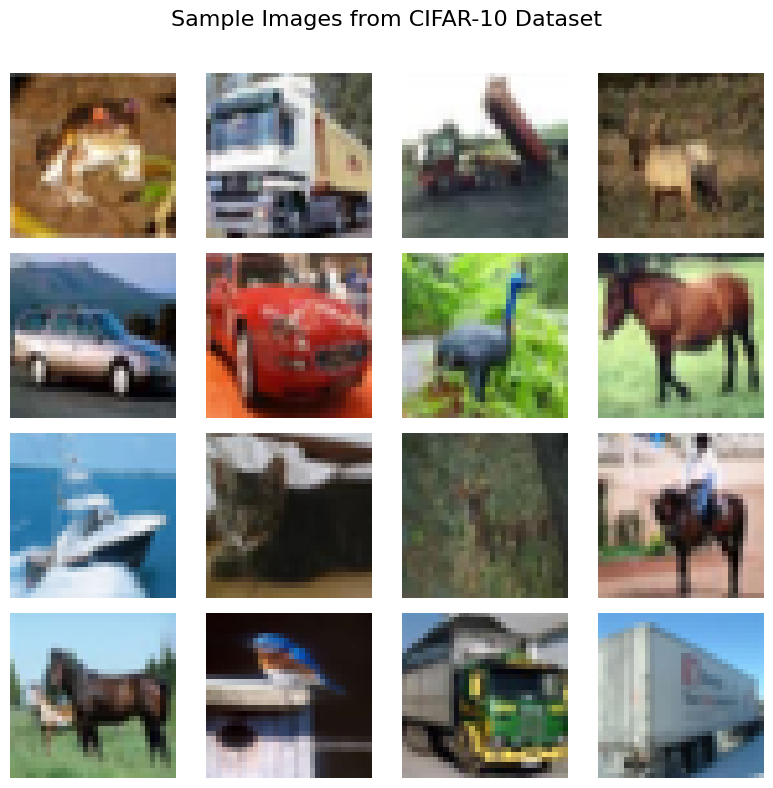

In [2]:
import matplotlib.pyplot as plt

# Display 16 images in a 4x4 grid
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
fig.suptitle('Sample Images from CIFAR-10 Dataset', fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(32, 32, 3))
    ax.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

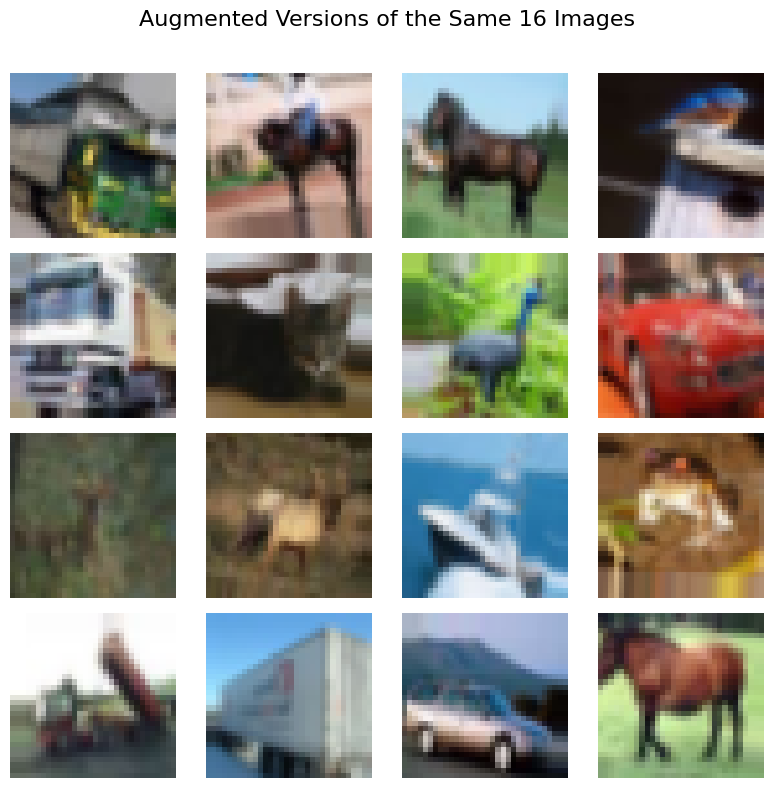

In [5]:
# Display the same 16 images from the original dataset but augmented
indices = list(range(16))
original_images = X_train[indices]
augmented_images, _ = next(datagen.flow(original_images, y_train[indices], batch_size=16))

fig, axes = plt.subplots(4, 4, figsize=(8, 8))
fig.suptitle('Augmented Versions of the Same 16 Images', fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(augmented_images[i].reshape(32, 32, 3))
    ax.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

2. Define the Dense model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# In this version, I increased the model's depth
model = Sequential(
    [
        Dense(1024, activation='relu', name = "L1", input_shape=(3072,)),
        Dropout(0.3),
        Dense(512, activation = 'relu', name = "L2"),
        Dropout(0.3),
        Dense(256, activation = 'relu', name = "L3"),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ]
)

3. Compile model

In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

4. Training

In [18]:
history = model.fit(X_train.reshape(-1, 32*32*3), y_train,
                    epochs=30,
                    batch_size=128,
                    validation_data=(X_test, y_test))

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.1999 - loss: 2.2108 - val_accuracy: 0.3546 - val_loss: 1.7996
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.3123 - loss: 1.8893 - val_accuracy: 0.3724 - val_loss: 1.7706
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.3299 - loss: 1.8383 - val_accuracy: 0.3962 - val_loss: 1.7239
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.3539 - loss: 1.7742 - val_accuracy: 0.4147 - val_loss: 1.6743
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.3664 - loss: 1.7503 - val_accuracy: 0.4246 - val_loss: 1.6633
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.3687 - loss: 1.7333 - val_accuracy: 0.4157 - val_loss: 1.6460
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.3760 - loss: 1.7206 - val_accuracy: 0.3891 - val_loss: 1.6942
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.3831 - loss: 1.7073 - 

5. Evaluation and visualization

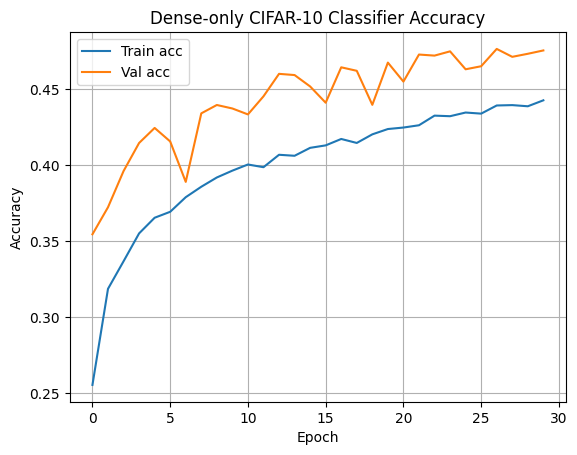

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4717 - loss: 1.5029

Test Accuracy: 47.56%


In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Dense-only CIFAR-10 Classifier Accuracy')
plt.grid(True)
plt.show()

# Evaluación final
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")
